#SINUSOID FUNCTION
We will train a Neural network to predict the amplitud, the period and the phase of a sinusoid function of the form f(A, T, phi)=Asin(2pi/T*t +phi)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving Sinusoid_ML.txt to Sinusoid_ML.txt


{'Sinusoid_ML.txt': b'1.4309495757333417,43.046230152058065,137.86185901717528,0.7955128736048416,0.6140538534766348,0.4195353875762654,0.21609441494047749,0.008057634823627164,-0.20015051176936346,-0.4041019392815707,-0.5994590923134622,-0.7820671949740013,-0.948042612952041,-1.0938554490596977,-1.2164046156395107,-1.3130837872261951,-1.3818368308088005,-1.4212015348251739,-1.4303407068783809,-1.409059978801598,-1.35781194040065,-1.2776865139594489,-1.1703877742194142,-1.038197706816046,-0.883927675943375,-0.7108586334121366,-0.5226713407108857,-0.32336808807870826,-0.1171875754361892,0.09148523454786645,0.29821237404591133,0.4985972549531316,0.6883781737219454,0.8635189475269851,1.0202947541477683,1.155371349961595,1.2658759812708327,1.3494584808515728,1.4043412503472605,1.4293570655022425,1.423973900209015,1.3883062414215015,1.323112654293423,1.2297796493254014,1.1102921946276936,0.9671915004316888,0.8035209736718619,0.6227614920540028,0.42875737417432064,0.2256346201265831,0.017713

In [ ]:
with open('Sinusoid_ML.txt', 'r') as file:
    data = file.read().split(',')

In [ ]:
data.pop() #only once to eliminate the last element of the list data which is a blank space due to the coma ,

''

In [ ]:
amplitude = [[0 for _ in range(1)] for _ in range(2000)]
period = [[0 for _ in range(1)] for _ in range(2000)]
phase = [[0 for _ in range(1)] for _ in range(2000)]
x = [[0 for _ in range(100)] for _ in range(2000)]
matrix = np.array(data).reshape(2000, 103)

In [ ]:
for i in range(2000):
  amplitude[i]=matrix[i,0].astype('float32')
  period[i]=matrix[i,1].astype('float32')
  phase[i]=matrix[i,2].astype('float32')

In [ ]:
for i in range(2000):
  for j in range(100):
    x[i][j]=matrix[i,j+3]
x_all = np.array(x).reshape(2000, 100)

In [ ]:
for i in range(2000):
  phase[i]=phase[i]*2*np.pi/360
  if phase[i]>2*np.pi:
    phase[i]=phase[i]-2*np.pi*(phase[i]//2*np.pi)

In [ ]:
number_train_data= int(2000*0.9*0.7)
number_val_data= int(2000*0.9*0.3)
number_test_data = int(2000*0.1)

In [ ]:
train_data = [[0 for _ in range(100)] for _ in range(number_train_data)]
val_data = [[0 for _ in range(100)] for _ in range(number_val_data)]
test_data = [[0 for _ in range(100)] for _ in range(number_test_data)]
train_labels1 = [[0 for _ in range(1)] for _ in range(number_train_data)]
test_labels1 = [[0 for _ in range(1)] for _ in range(number_test_data)]
train_labels2 = [[0 for _ in range(1)] for _ in range(number_train_data)]
test_labels2 = [[0 for _ in range(1)] for _ in range(number_test_data)]
val_labels1 = [[0 for _ in range(1)] for _ in range(number_val_data)]
val_labels2 = [[0 for _ in range(1)] for _ in range(number_val_data)]
train_labels3 = [[0 for _ in range(1)] for _ in range(number_train_data)]
test_labels3 = [[0 for _ in range(1)] for _ in range(number_test_data)]
val_labels3 = [[0 for _ in range(1)] for _ in range(number_val_data)]

for i in range(number_train_data):
  for j in range(100):
      train_data[i][j]=x_all[i,j]
for i in range(number_train_data, number_train_data+number_val_data):
  for j in range(100):
      val_data[i-number_train_data][j]=x_all[i,j]
for i in range(number_train_data+number_val_data, 2000):
  for j in range(100):
      test_data[i-number_train_data-number_val_data][j]=x_all[i,j]

In [ ]:
for i in range (number_train_data):
    train_labels1[i]=period[i].astype('float32')
    train_labels2[i]=amplitude[i].astype('float32')
    train_labels3[i]=phase[i].astype('float32')

for i in range(number_train_data, number_train_data+number_val_data):
    val_labels1[i-number_train_data]=period[i].astype('float32')
    val_labels2[i-number_train_data]=amplitude[i].astype('float32')
    val_labels3[i-number_train_data]=phase[i].astype('float32')

for i in range(number_train_data+number_val_data, 2000):
    test_labels1[i-number_train_data-number_val_data]=period[i].astype('float32')
    test_labels2[i-number_train_data-number_val_data]=amplitude[i].astype('float32')
    test_labels3[i-number_train_data-number_val_data]=phase[i].astype('float32')

In [ ]:
test_labels = np.column_stack(((test_labels1-np.min(test_labels1))/(np.max(test_labels1)-np.min(test_labels1)), (test_labels2-np.min(test_labels2))/(np.max(test_labels2)-np.min(test_labels2)), (test_labels3-np.min(test_labels3))/(np.max(test_labels3)-np.min(test_labels3))))
train_labels = np.column_stack(((train_labels1-np.min(train_labels1))/(np.max(train_labels1)-np.min(train_labels1)), (train_labels2-np.min(train_labels2))/(np.max(train_labels2)-np.min(train_labels2)), (train_labels3-np.min(train_labels3))/(np.max(train_labels3)-np.min(train_labels3))))
val_labels = np.column_stack(((val_labels1-np.min(val_labels1))/(np.max(val_labels1)-np.min(val_labels1)), (val_labels2-np.min(val_labels2))/(np.max(val_labels2)-np.min(val_labels2)), (val_labels3-np.min(val_labels3))/(np.max(val_labels3)-np.min(val_labels3))))

In [ ]:
train_data = np.array(train_data).astype('float32')
train_data = (train_data-np.min(train_data)/(np.max(train_data)-np.min(train_data))).astype('float32')
train_data = train_data.reshape((number_train_data,100*1)).astype('float32')

In [ ]:
val_data = np.array(val_data).astype('float32')
val_data = (val_data-np.min(val_data)/(np.max(val_data)-np.min(val_data))).astype('float32')
val_data = val_data.reshape((number_val_data,100*1)).astype('float32')

In [ ]:
test_data = np.array(test_data).astype('float32')
test_data = (test_data-np.min(test_data)/(np.max(test_data)-np.min(test_data))).astype('float32')
test_data = test_data.reshape((number_test_data,100*1)).astype('float32')

In [ ]:
print(np.isnan(train_data).any())
print(np.isnan(train_labels).any())
print(np.isnan(val_data).any())
print(np.isnan(val_labels).any())

False
False
False
False


In [ ]:
train_data_reshaped = train_data.reshape((-1, 1, 100))
test_data_reshaped = test_data.reshape((-1, 1, 100))
val_data_reshaped = val_data.reshape((-1, 1, 100))


In [ ]:
train_labels = tf.stack(train_labels.astype('float32'))
train_data = tf.stack(train_data_reshaped.astype('float32'))
val_data= tf.stack(val_data_reshaped.astype('float32'))
val_labels = tf.stack(val_labels.astype('float32'))


In [ ]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(1, 100)),
    layers.Conv1D(5, kernel_size=3, activation='linear', padding='same'),
    layers.Conv1D(12, kernel_size=3, activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(3, activation='linear')
])

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50, batch_size=64)
#print(history.history['loss'])


Epoch 1/50
20/20 [==============================] - 4s 43ms/step - loss: 0.1360 - mae: 0.2862 - val_loss: 0.0814 - val_mae: 0.2209
Epoch 2/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0699 - mae: 0.2034 - val_loss: 0.0582 - val_mae: 0.1833
Epoch 3/50
20/20 [==============================] - 0s 17ms/step - loss: 0.0530 - mae: 0.1753 - val_loss: 0.0471 - val_mae: 0.1638
Epoch 4/50
20/20 [==============================] - 0s 14ms/step - loss: 0.0435 - mae: 0.1592 - val_loss: 0.0399 - val_mae: 0.1502
Epoch 5/50
20/20 [==============================] - 0s 13ms/step - loss: 0.0377 - mae: 0.1462 - val_loss: 0.0360 - val_mae: 0.1425
Epoch 6/50
20/20 [==============================] - 0s 13ms/step - loss: 0.0340 - mae: 0.1366 - val_loss: 0.0340 - val_mae: 0.1407
Epoch 7/50
20/20 [==============================] - 0s 13ms/step - loss: 0.0314 - mae: 0.1305 - val_loss: 0.0316 - val_mae: 0.1303
Epoch 8/50
20/20 [==============================] - 0s 13ms/step - loss: 0.0297 - m

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 1, 5)              1505      
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 18)             288       
                                                                 
 flatten_5 (Flatten)         (None, 18)                0         
                                                                 
 dense_15 (Dense)            (None, 120)               2280      
                                                                 
 dense_16 (Dense)            (None, 120)               14520     
                                                                 
 dense_17 (Dense)            (None, 3)                 363       
                                                                 
Total params: 18956 (74.05 KB)
Trainable params: 18956

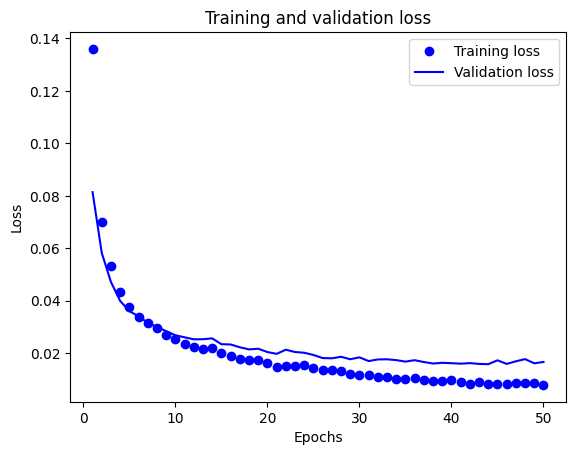

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_data_reshaped)

7/7 [==============================] - 0s 12ms/step


In [ ]:
#for i in range (200):
#  if predictions[i,2]>1:
#    predictions[i,2]=(predictions[i,2]-predictions[i,2]//1)

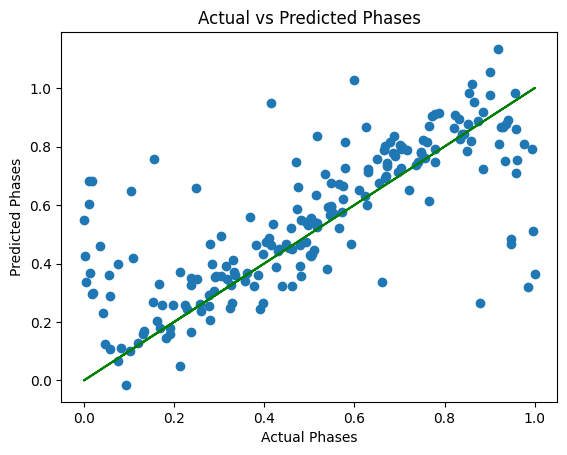

In [ ]:
test_T = [[0 for _ in range(1)] for _ in range(number_test_data)]
test_A = [[0 for _ in range(1)] for _ in range(number_test_data)]
test_P = [[0 for _ in range(1)] for _ in range(number_test_data)]


for i in range(number_test_data):
  test_T[i]=test_labels[i,0]
  test_A[i]=test_labels[i,1]
  test_P[i]=test_labels[i,2]


test_T = np.array(test_T)
test_A = np.array(test_A)
test_P = np.array(test_P)

plt.plot(train_labels[:,2], train_labels[:,2], color='green')
plt.scatter(test_P, predictions[:,2])
plt.xlabel('Actual Phases')
plt.ylabel('Predicted Phases')
plt.title('Actual vs Predicted Phases')

plt.show()

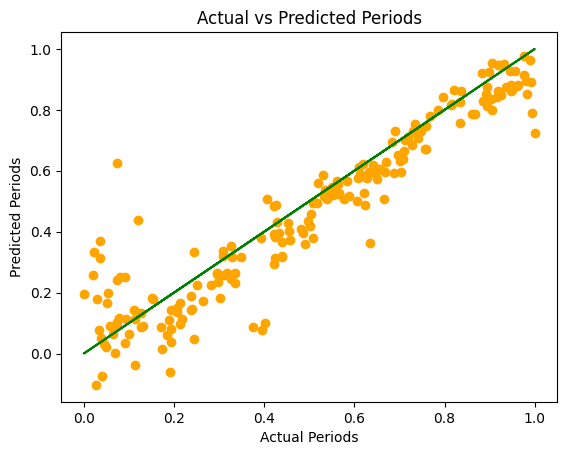

In [ ]:
plt.scatter(test_T, predictions[:,0], color='orange')
plt.plot(train_labels[:,0], train_labels[:,0], color='green')
plt.xlabel('Actual Periods')
plt.ylabel('Predicted Periods')
plt.title('Actual vs Predicted Periods')


plt.show()

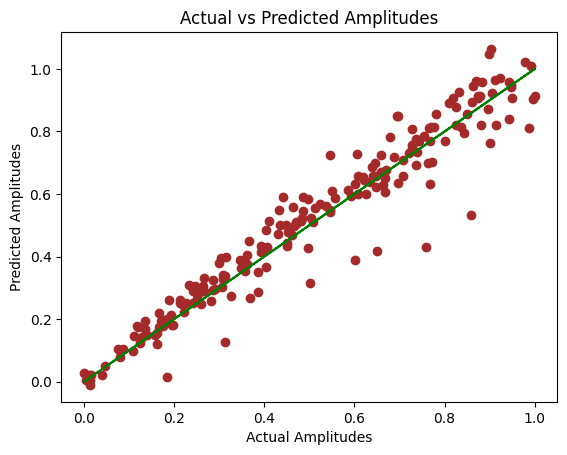

In [ ]:
plt.plot(train_labels[:,1], train_labels[:,1], color='green')
plt.scatter(test_A, predictions[:,1],color='brown')
plt.xlabel('Actual Amplitudes')
plt.ylabel('Predicted Amplitudes')
plt.title('Actual vs Predicted Amplitudes')

plt.show()

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name: #layer.name has the name of the layer
    continue
 # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)


conv1d_14 (3, 100, 5)
conv1d_15 (3, 5, 12)


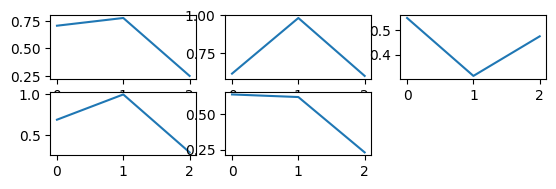

In [ ]:

filters, biases = model.layers[0].get_weights()#we choose the first layer

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot filters
n_filters, ix = 5, 1
#6 because i is in the last index
for i in range(n_filters):
 # get the filter
 f = filters[:, :, i]
 # plot each channel separately
 for j in range(1):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  #ix is the index of the subplot you want to create
  #plot filter channel in grayscale
  plt.plot(f[:,0])
  ix += 1
# show the figure
plt.show()


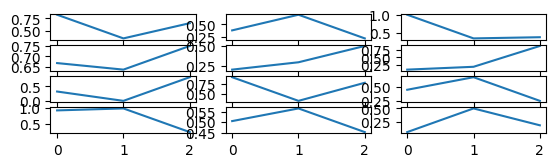

In [ ]:

filters, biases = model.layers[1].get_weights()#we choose the first layer

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot filters
n_filters, ix = 12, 1
#6 because i is in the last index
for i in range(n_filters):
 # get the filter
 f = filters[:, :, i]
 # plot each channel separately
 for j in range(1):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  #ix is the index of the subplot you want to create
  #plot filter channel in grayscale
  plt.plot(f[:,0])
  ix += 1
# show the figure
plt.show()